# Ejercicio 5 — Rasterización desde Cero


En este notebook implementamos desde cero tres algoritmos clásicos de rasterización:
- Algoritmo de **Bresenham** para líneas.
- Algoritmo de **Punto Medio** para círculos.
- Algoritmo de **Scanline** para triángulos.

📌 *Sin librerías gráficas de alto nivel (solo NumPy y Matplotlib).*

## 1. Algoritmo de Bresenham — Líneas
Este algoritmo permite dibujar líneas de forma eficiente usando solo operaciones enteras.

**Idea básica:**
- Se avanza paso a paso en la dirección X, calculando el error para decidir cuándo incrementar Y.
- No se usan multiplicaciones o divisiones en cada paso.

📈 Se utiliza comúnmente en dispositivos donde la eficiencia es clave (ej. primeros videojuegos, impresoras).

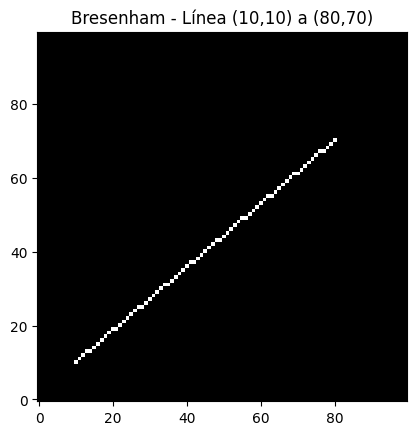

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def bresenham_line(x0, y0, x1, y1):
    points = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        points.append((x0, y0))
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy
    return points

# Ejemplo de uso
canvas = np.zeros((100, 100))
for x, y in bresenham_line(10, 10, 80, 70):
    canvas[y, x] = 1

plt.imshow(canvas, cmap='gray', origin='lower')
plt.title('Bresenham - Línea (10,10) a (80,70)')
plt.show()


## 2. Algoritmo de Punto Medio — Círculos
Este algoritmo rasteriza un círculo aprovechando su **simetría octogonal**, calculando solo un octante y reflejando los puntos.

**Idea básica:**
- Se inicia en (0, r) y se avanza en x.
- Se utiliza un parámetro de decisión `p` para determinar si el siguiente punto está dentro o fuera del círculo ideal.
- Los puntos se reflejan en los 8 octantes para dibujar el círculo completo.

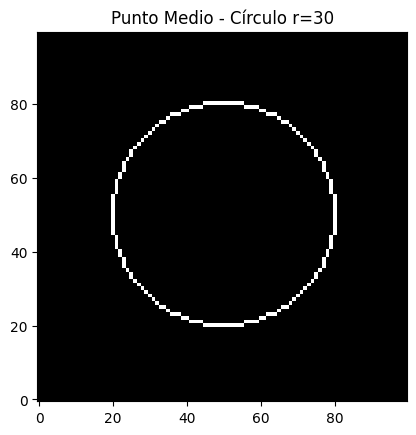

In [2]:

def midpoint_circle(cx, cy, r):
    points = []
    x = 0
    y = r
    p = 1 - r

    def plot_circle_points(cx, cy, x, y):
        return [
            (cx + x, cy + y), (cx - x, cy + y),
            (cx + x, cy - y), (cx - x, cy - y),
            (cx + y, cy + x), (cx - y, cy + x),
            (cx + y, cy - x), (cx - y, cy - x)
        ]

    while x <= y:
        points.extend(plot_circle_points(cx, cy, x, y))
        x += 1
        if p < 0:
            p += 2*x + 1
        else:
            y -= 1
            p += 2*(x - y) + 1
    return points

# Ejemplo
canvas = np.zeros((100, 100))
for x, y in midpoint_circle(50, 50, 30):
    if 0 <= x < canvas.shape[1] and 0 <= y < canvas.shape[0]:
        canvas[y, x] = 1

plt.imshow(canvas, cmap='gray', origin='lower')
plt.title('Punto Medio - Círculo r=30')
plt.show()


## 3. Algoritmo de Scanline — Triángulos
El algoritmo **Scanline** rellena un triángulo línea por línea (por filas de pixeles),
intersectando las aristas con cada scanline horizontal.

**Idea básica:**
- Se ordenan los vértices por Y.
- Para cada fila, se encuentran las intersecciones con los lados del triángulo.
- Se rellenan los puntos entre las intersecciones izquierda y derecha.

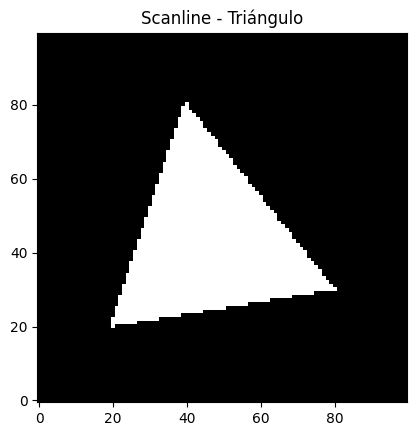

In [3]:

def fill_triangle(p1, p2, p3, canvas):
    # Ordenar vértices por Y
    pts = sorted([p1, p2, p3], key=lambda p: p[1])
    x1,y1 = pts[0]
    x2,y2 = pts[1]
    x3,y3 = pts[2]

    def edge_interpolate(y, x0,y0, x1,y1):
        if y1 == y0:
            return x0
        return x0 + (x1 - x0) * (y - y0) / (y1 - y0)

    for y in range(int(y1), int(y3)+1):
        if y < y2:
            xa = edge_interpolate(y, x1,y1, x3,y3)
            xb = edge_interpolate(y, x1,y1, x2,y2)
        else:
            xa = edge_interpolate(y, x1,y1, x3,y3)
            xb = edge_interpolate(y, x2,y2, x3,y3)

        if xa > xb:
            xa, xb = xb, xa
        for x in range(int(xa), int(xb)+1):
            if 0 <= x < canvas.shape[1] and 0 <= y < canvas.shape[0]:
                canvas[y, x] = 1

# Ejemplo
canvas = np.zeros((100, 100))
fill_triangle((20,20), (80,30), (40,80), canvas)

plt.imshow(canvas, cmap='gray', origin='lower')
plt.title('Scanline - Triángulo')
plt.show()


## 4. Reflexión: Precisión y Eficiencia
- **Bresenham**: muy eficiente, sólo usa enteros. Ideal para líneas con pendiente moderada.
- **Punto Medio**: explota simetría, calcula sólo un octante → muy eficiente.
- **Scanline**: más costoso pero rellena polígonos con precisión pixel-perfect.

📝 *Estos algoritmos forman la base de la rasterización moderna usada en GPUs.*